In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_pickle('../data/cleaned/combined.pkl')
df.head()

,order_id,customer_name,restaurant_id,order_date,quantity_of_items,order_amount,payment_mode,delivery_time_taken_(mins),customer_rating_food,customer_rating_delivery,day,hour,weekday,month,is_weekend,restaurant_name,cuisine,zone,category
0,OD1,srini,6,2022-01-01 23:15:00,5,633,debit_card,47,5,3,2022-01-01,23,5,1,weekend,willies,french,zone_d,pro
1,OD2,revandh,13,2022-01-01 19:21:00,5,258,credit_card,41,3,5,2022-01-01,19,5,1,weekend,veer_restaurant,chinese,zone_d,ordinary
2,OD3,david,9,2022-01-01 23:15:00,7,594,cash_on_delivery,30,3,4,2022-01-01,23,5,1,weekend,excel_restaurant,north_indian,zone_d,ordinary
3,OD4,selva,4,2022-01-01 20:31:00,5,868,cash_on_delivery,30,3,4,2022-01-01,20,5,1,weekend,win_hotel,south_indian,zone_d,ordinary
4,OD5,vinny,4,2022-01-01 11:10:00,4,170,debit_card,18,4,3,2022-01-01,11,5,1,weekend,win_hotel,south_indian,zone_d,ordinary


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   order_id                    500 non-null    object        
 1   customer_name               500 non-null    object        
 2   restaurant_id               500 non-null    int64         
 3   order_date                  500 non-null    datetime64[ns]
 4   quantity_of_items           500 non-null    int64         
 5   order_amount                500 non-null    int64         
 6   payment_mode                500 non-null    category      
 7   delivery_time_taken_(mins)  500 non-null    int64         
 8   customer_rating_food        500 non-null    int64         
 9   customer_rating_delivery    500 non-null    int64         
 10  day                         500 non-null    object        
 11  hour                        500 non-null    int32         

In [8]:
# Mapping cuisine with Restaurants
mapped_res = df.groupby('restaurant_name')['cuisine'].first().reset_index()
mapped_res

,restaurant_name,cuisine
0,amn,north_indian
1,anand_restaurant,african
2,asr_restaurant,south_indian
3,chew_restaurant,belgian
4,dave_hotel,south_indian
5,denver_restaurant,continental
6,ellora,african
7,excel_restaurant,north_indian
8,ksr_hotel,chinese
9,oslo,french


In [11]:
# Aggregate the data by cuisine
cuisine_data = df.groupby('cuisine').agg(
    total_revenue=('order_amount', 'sum'),
    total_quantity=('quantity_of_items', 'sum'),
    avg_food_rating=('customer_rating_food', 'mean'),
    avg_delivery_rating=('customer_rating_delivery', 'mean')
).reset_index()

# Sort by total revenue (you can change this to another metric if needed)
cuisine_data_sorted = cuisine_data.sort_values(by='total_revenue', ascending=False)

# Display the aggregated data
cuisine_data_sorted

,cuisine,total_revenue,total_quantity,avg_food_rating,avg_delivery_rating
6,north_indian,46706,371,3.592593,3.000000
3,chinese,45437,361,3.308642,2.851852
5,french,45121,342,3.267606,2.957746
7,south_indian,38855,316,3.214286,3.285714
0,african,36452,300,3.459016,3.081967
2,belgian,34996,253,3.250000,2.642857
4,continental,34882,267,3.381818,3.072727
1,arabian,16622,116,3.440000,3.080000


In [12]:
# Normalisation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cuisine_data_sorted[['revenue_score', 'food_rating_score', 'delivery_rating_score']] = scaler.fit_transform(
    cuisine_data_sorted[['total_revenue', 'avg_food_rating', 'avg_delivery_rating']]
)

# Weighted scoring
cuisine_data_sorted['total_score'] = (
    cuisine_data_sorted['revenue_score'] * 0.5 + 
    cuisine_data_sorted['food_rating_score'] * 0.3 +
    cuisine_data_sorted['delivery_rating_score'] * 0.2
)

# Sort cuisines by total_score
recommended_cuisines = cuisine_data_sorted.sort_values(by='total_score', ascending=False)

# Display top recommendations
recommended_cuisines


,cuisine,total_revenue,total_quantity,avg_food_rating,avg_delivery_rating,revenue_score,food_rating_score,delivery_rating_score,total_score
6,north_indian,46706,371,3.592593,3.000000,1.000000,1.000000,0.555556,0.911111
0,african,36452,300,3.459016,3.081967,0.659154,0.646910,0.683060,0.660262
3,chinese,45437,361,3.308642,2.851852,0.957818,0.249417,0.325103,0.618755
5,french,45121,342,3.267606,2.957746,0.947314,0.140944,0.489828,0.613906
4,continental,34882,267,3.381818,3.072727,0.606967,0.442848,0.668687,0.570075
7,south_indian,38855,316,3.214286,3.285714,0.739031,0.000000,1.000000,0.569515
2,belgian,34996,253,3.250000,2.642857,0.610757,0.094406,0.000000,0.333700
1,arabian,16622,116,3.440000,3.080000,0.000000,0.596643,0.680000,0.314993


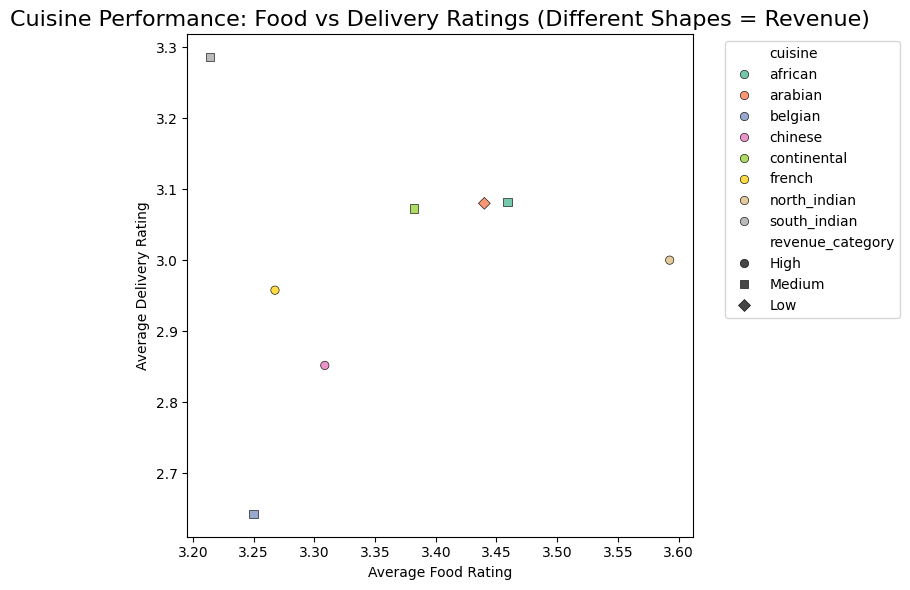

In [13]:
# Defining the category range of revenue
def categorize_revenue(revenue):
    if revenue < 25000:
        return 'Low'
    elif 25000 <= revenue <= 40000:
        return 'Medium'
    else:
        return 'High'

recommended_cuisines['revenue_category'] = recommended_cuisines['total_revenue'].apply(categorize_revenue)

plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=recommended_cuisines,
    x='avg_food_rating',
    y='avg_delivery_rating',
    hue='cuisine',
    style='revenue_category',
    palette='Set2',
    markers=["o", "s", "D"], 
    alpha=0.9,
    edgecolor='black'
)

plt.title('Cuisine Performance: Food vs Delivery Ratings (Different Shapes = Revenue)', fontsize=16)
plt.xlabel('Average Food Rating')
plt.ylabel('Average Delivery Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

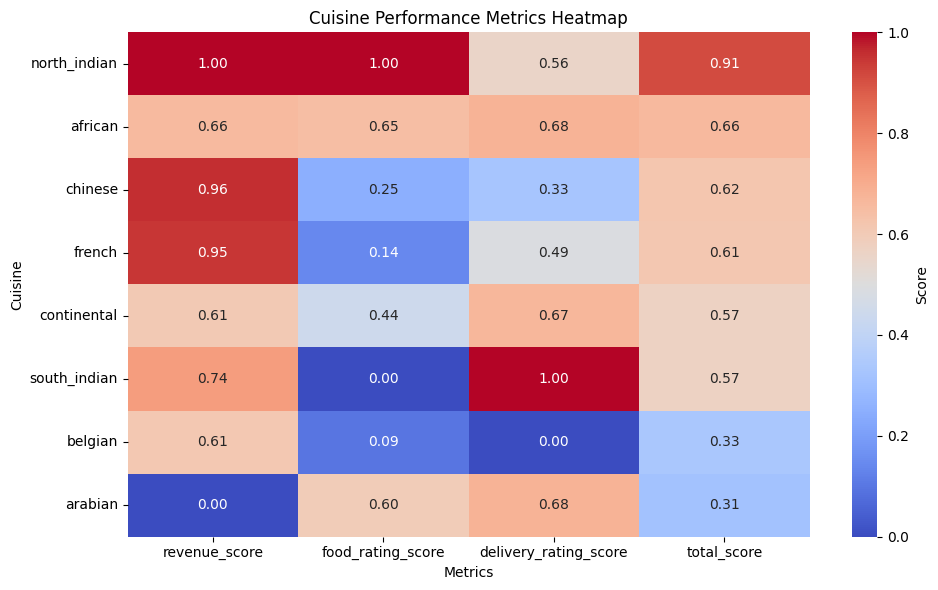

In [14]:
heatmap_data = recommended_cuisines[['cuisine', 'revenue_score', 'food_rating_score', 'delivery_rating_score', 'total_score']]
heatmap_data.set_index('cuisine', inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Score'})
plt.title('Cuisine Performance Metrics Heatmap')
plt.ylabel('Cuisine')
plt.xlabel('Metrics')
plt.tight_layout()
plt.show()

- Which cuisines generate the most revenue?
    - __north_indian__ cuisine generates the most revenue
- Which cuisines have the highest customer ratings for food and delivery?
    - __north_indian__ outperforms in food rating but __south_indian__ outperforms in delivery perspective
    - considering both __north_indian__ outperforms other cuisine
- Are there any under-performing cuisines (e.g., high ratings but low revenue)?
    - __arabian__ is under-performing cuisine
- Based on the combined score, which cuisines should be promoted or optimized?
    - __arabian__ and __african__ should be promoted more